<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du Lagrangien Augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problémes sans
contraintes (fichier `Lagrangien_Augmente.jl`). La spécification de l'algorithme du Lagrangien augmenté est donnée ci-dessous.
 

In [19]:
using LinearAlgebra
using Documenter
using Markdown  
include("Lagrangien_Augmente.jl")
#@doc Lagrangien_Augmente

Lagrangien_Augmente (generic function with 1 method)

3. Vérifier que les tests ci-dessous passent.

In [20]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_lagrangien_augmente.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Lagrangien_Augmente.jl")

affiche = false

@testset "Test lagrangien augmente" begin
	tester_lagrangien_augmente(affiche, Lagrangien_Augmente)
end;

Test Summary:            | Pass  Total  Time
Test lagrangien augmente |   12     12  3.4s


## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs de $\lambda_k$ et $\mu_k$.
 
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.
 
 3. **Supplémentaire** : 
      Que proposez-vous comme méthode pour la résolution des problèmes avec
      des contraintes à la fois d'égalité et d'inégalité ? Implémenter (si le temps le permet)
      ce nouvel algorithme.

1.

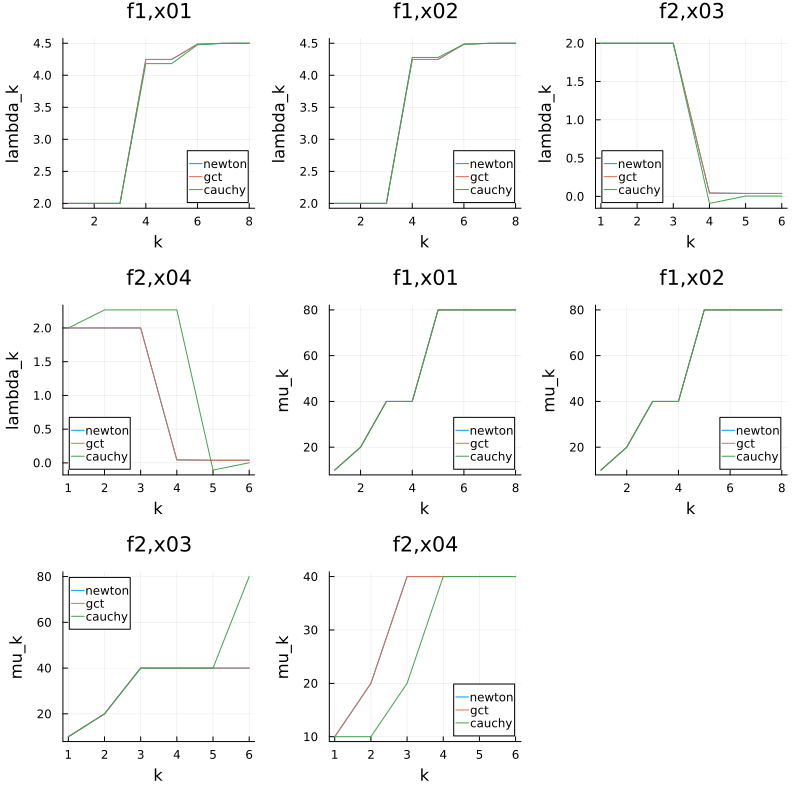

In [23]:
"""Code à lancer pour la question 1"""

#using Pkg
#Pkg.add("Plots")
using Plots

# initialisation des paramètres
lambda0 = 2
mu0 = 10
tho = 2
epsilon = 1.
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]
# La tolérance utilisée dans les tests
tol_erreur = 1e-4

# Les trois algorithmes d'optimisations sans contraintes utlisés
algos = ["newton", "gct", "cauchy"]


## ajouter les données nécessaires
include("../test/fonctions_de_tests.jl")


pts = [x01, x02, x03, x04]
nb_algos = length(algos)
nb_pts = length(pts)

p_lambda = []
p_mu = []

for j in 1:nb_pts
    if j <= 2
        f = fct1
        c = contrainte1
        g = grad_fct1
        h = hess_fct1
        gc = grad_contrainte1
        hc = hess_contrainte1
    else
        f = fct2
        c = contrainte2
        g = grad_fct2
        h = hess_fct2
        gc = grad_contrainte2
        hc = hess_contrainte2
    end
    (~, ~, ~, ~,muks_newton, lambdaks_newton) = Lagrangien_Augmente("newton",f,c,g,h,gc,hc,pts[j],options)
    (~, ~, ~, ~,muks_gct, lambdaks_gct) = Lagrangien_Augmente("gct",f,c,g,h,gc,hc,pts[j],options)
    (~, ~, ~, ~,muks_cauchy, lambdaks_cauchy) = Lagrangien_Augmente("cauchy",f,c,g,h,gc,hc,pts[j],options)
    x_lambda = min(length(lambdaks_newton), length(lambdaks_gct), length(lambdaks_cauchy))
    x_mu = min(length(muks_newton), length(muks_gct), length(muks_cauchy))
    push!(p_lambda, plot(1:x_lambda,[lambdaks_newton[1:x_lambda] lambdaks_gct[1:x_lambda] lambdaks_cauchy[1:x_lambda]], label = ["newton" "gct" "cauchy"]))
    push!(p_mu, plot(1:x_mu,[muks_newton[1:x_mu] muks_gct[1:x_mu] muks_cauchy[1:x_mu]], label = ["newton" "gct" "cauchy"]))
end



plot(plot(p_lambda[1], xlabel= "k", ylabel = "lambda_k", title = "f1,x01"),
     plot(p_lambda[2], xlabel= "k", ylabel = "lambda_k", title = "f1,x02"),
     plot(p_lambda[3], xlabel= "k", ylabel = "lambda_k", title = "f2,x03"),
     plot(p_lambda[4], xlabel= "k", ylabel = "lambda_k", title = "f2,x04"),
     plot(p_mu[1], xlabel= "k", ylabel = "mu_k", title = "f1,x01"),
     plot(p_mu[2], xlabel= "k", ylabel = "mu_k", title = "f1,x02"),
     plot(p_mu[3], xlabel= "k", ylabel = "mu_k", title = "f2,x03"),
     plot(p_mu[4], xlabel= "k", ylabel = "mu_k", title = "f2,x04"), size = (800, 800)
)



   - Pour $f_1$ avec tous les points initiaux et $f_2$ avec $x_{03}$ en point initial, on remarque que les 3 algos ont des valeurs de $\lambda_k$ et $\mu_k$ pratiquement identiques.
   - Pour $f_2$ avec $x_{04}$ en point initial, l'algo du Lagrangien Augmenté avec Cauchy met une itération de plus à atteindre $\lambda_{max}$ et $\mu_{min}$ que Newton et GCT, on peut ainsi dire qu'il est le moins performant.
   - On remarque de manière générale que $\mu_k$ atteint une valeur finale deux fois inférieure pour $f_2$ en $x_{04}$  par rapport à tous les autres cas. Ceci peut s'expliquer par le fait que c'est le point le plus proche de sa solution donc on réduit l'augmentation de $\mu_k$
   - Finalement, on remarque que $\lambda_k$ diminue pour $f_2$ tandis qu'il augmente pour $f_1$. Ceci peut s'expliquer par le fait que la contrainte de $f_2$ est quadratique tandis que celle de $f_1$ ne l'est pas.

2.

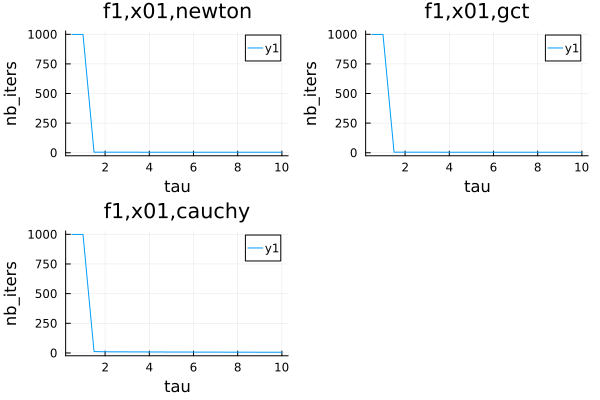

In [24]:
"""Code à lancer pour la question 2 (normal si cela met un peu de temps à afficher, cela est dû aux faibles de tho conduisant à des grands nombres d'itérations)"""

#using Pkg
#Pkg.add("Plots")
using Plots

# initialisation des paramètres
lambda0 = 2
mu0 = 10
tho = [0.5,1,1.5,2,5,10]
epsilon = 1.
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]
# La tolérance utilisée dans les tests
tol_erreur = 1e-4

# Les trois algorithmes d'optimisations sans contraintes utlisés
algos = ["newton", "gct", "cauchy"]


## ajouter les données nécessaires
include("../test/fonctions_de_tests.jl")

perf = []
affichage = []

for i in 1:nb_algos
    for j in 1:length(tho)
        xmin,fxmin,flag,nb_iters = Lagrangien_Augmente(algos[i],fct2,contrainte2,grad_fct2,hess_fct2,grad_contrainte2,
			hess_contrainte2,pts2.x03,[epsilon, tol, max_iters, lambda0, mu0, tho[j]])
        push!(perf, nb_iters)
    end
    push!(affichage,plot(tho,perf))
    perf = []
end


plot(plot(affichage[1], xlabel= "tau", ylabel = "nb_iters", title = "f1,x01,newton"),
     plot(affichage[2], xlabel= "tau", ylabel = "nb_iters", title = "f1,x01,gct"),
     plot(affichage[3], xlabel= "tau", ylabel = "nb_iters", title = "f1,x01,cauchy"))



On remarque que la performance de l'algo croit avec $\tau$ que ce soit pour Newton, Cauchy ou GCT (les tracés en utilisant $f_2$ à ses deux points initiaux et $f_1$ en $x_{02}$  sont identiques à ceux affichés).